# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### 2.6.1. Дополнительная катерогизация данных

**Добавление 1. Создайте функцию, которая на основании данных из столбца `dob_years` сформирует новый столбец `years_category`, в который войдут следующие категории:**

- `'молодые'` - до 35 лет включительно,
- `'взрослые'` - с 36 до 50 лет включительно,
- `'зрелые'` - с 51 до 65 лет включительно,
- `'пожилые'` - с 66 и старше.

**Например, если в столбце `dob_years` находится `'25'`, то в столбце `years_category` должна появиться строка `'молодые'`.**

**Используйте собственную функцию с именем `categorize_age()` и метод `apply()`.**

In [22]:
def categorize_age(age):
    try:
        if 0 <= age <= 35:
            return 'молодые'
        elif 36 <= age <= 50:
            return 'взрослые'
        elif 51 <= age <= 65:
            return 'зрелые'
        elif 66 <= age:
            return 'пожилые'
    except:
        pass

In [23]:
data['years_category'] = data['dob_years'].apply(categorize_age)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int64  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
 14  years_category         21331 non-null  object 
dtypes:

In [74]:
# сгруппируем данные по полу клиента
debt_grouped = data.groupby('debt')
# узнаем распределение клиентов по полу
debt_distribution = debt_grouped['debt'].count()

In [79]:
debt_distribution

debt
0    19599
1     1732
Name: debt, dtype: int64

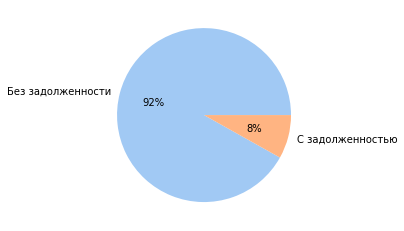

In [81]:
# визуализируем долю задолжников среди клиентов
# определим данные
debt_data = [19599,  1732]
labels = ['Без задолженности', 'С задолженностью']

# определим палитру Seaborn
colors = sns.color_palette('pastel')[ 0:5 ]

# создаём кпуговую диаграмму
plt.pie(debt_data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Средняя средняя доля задолжников среди клиентов банка составляет примерно `8%`.  Анализируя задолженности по категориям, мы будем иметь в виду, что если в определённом сегменте процент клиентов с просроченными кредитами выше, то это сигнал к тому, что клиенты этой категории может черыв нарушить сроки по выплате. И наоборот, - если ниже среднего, то клиент в соответсвующем сегменте с меньше долей вероятности просрочит выплату по кредиту.

#### 3.0. Предварительные исследования

В данной части работы находятся исследования, позволяющие уточнить выводы в основной части.

##### 3.0.1. Есть ли зависимость между полом и возвратом кредита в срок?

In [26]:
# сгруппируем данные по полу клиента
gender_grouped = data.groupby('gender')
# узнаем распределение клиентов по полу
gender_distribution = gender_grouped['debt'].count()
# узнаем распределение задолжкеностей по полу
debt_gender_distribution = gender_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по полу
percent_debt_gender_distribution = round(100 * debt_gender_distribution / gender_distribution, 2)

In [28]:
# создадим на основе Series один DataFrame
df_gender = pd.DataFrame()
genger_list = ['Женщины', 'Мужчины', 'Небинарные персоны']
df_gender['gender'] = genger_list

df_gender['gender_distribution'] = list(gender_distribution)
df_gender['debt_gender_distribution'] = list(debt_gender_distribution)
df_gender['percent_debt_gender_distribution'] = list(percent_debt_gender_distribution)
# назначим индексы
df_gender.set_index('gender', inplace=True)
df_gender

,gender_distribution,debt_gender_distribution,percent_debt_gender_distribution
gender,,,
Женщины,14092,989,7.02
Мужчины,7238,743,10.27
Небинарные персоны,1,0,0.00


<AxesSubplot:ylabel='gender_distribution'>

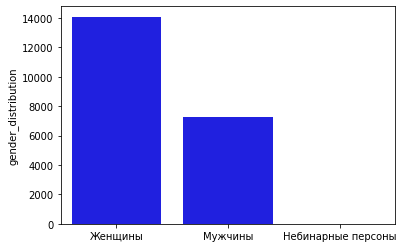

In [29]:
# визуализируем распределение клентов по полу
sns.barplot(x=genger_list, y="gender_distribution", color='blue', data=df_gender)

Из рисунка видно, что женщины примерно в два раза чалще берут кредмиы, чем мужчины. Можно сказать и так, что женщинам в 2 раза чаще одобряют кредиты, чем мужчинам.

<AxesSubplot:ylabel='debt_gender_distribution'>

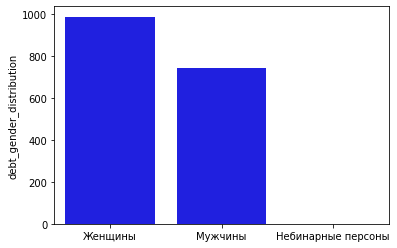

In [30]:
# визуализируем распределение должников по полу
sns.barplot(x=genger_list, y="debt_gender_distribution", color='blue', data=df_gender)

Количество должников среди представителей обоих полов примерно одинаковое.

<AxesSubplot:ylabel='percent_debt_gender_distribution'>

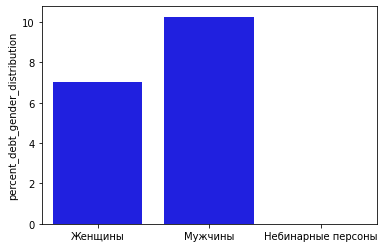

In [31]:
# визуализируем процент должников среди клиентов, рпсвределённое по полу
sns.barplot(x=genger_list, y="percent_debt_gender_distribution", color='blue', data=df_gender)

Однако внутри своей категории мужчины становятся должниками намного чаще.

**Вывод.** Да, имеется зависимость межу полом клиента и и возвратом кредита в срок. Женщины с большей  вероятностью будут возвращая деньги в срок, чем мужчины.

##### 3.0.2. Есть ли зависимость между возрастом и возвратом кредита в срок?

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
years_category_grouped = data.groupby('years_category')
# узнаем распределение клиентов по возрасту
years_category_distribution = years_category_grouped['debt'].count()
# узнаем распределение задолжкеностей по возрасту
debt_years_category_distribution = years_category_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по возрасту
percent_debt_years_category_distribution = round(100 * debt_years_category_distribution / years_category_distribution, 2)

In [33]:
# создадим на основе Series один DataFrame
df_age = pd.DataFrame()
age_list = ['взрослые','зрелые', 'молодые', 'пожилые']
df_age['age'] = age_list

df_age['years_category_distribution'] = list(years_category_distribution)
df_age['debt_years_category_distribution'] = list(debt_years_category_distribution)
df_age['percent_debt_years_category_distribution'] = list(percent_debt_years_category_distribution)
# назначим индексы
df_age.set_index('age', inplace=True)
df_age

,years_category_distribution,debt_years_category_distribution,percent_debt_years_category_distribution
age,,,
взрослые,8073,649,8.04
зрелые,5914,345,5.83
молодые,6644,703,10.58
пожилые,700,35,5.00


<AxesSubplot:ylabel='years_category_distribution'>

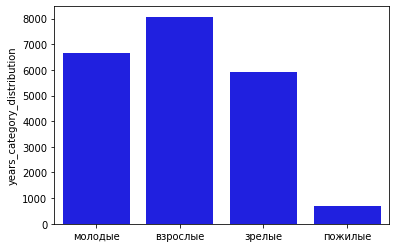

In [34]:
# визуализируем распределение клентов по возрасту
sns.barplot(x=age_list, 
            y="years_category_distribution", 
            color='blue', 
            data=df_age, 
            order=['молодые', 'взрослые','зрелые', 'пожилые'])

Из графика видно, что наиболее часто кредиты берут люди в возрастной группе 36-50 лет. Далее идут молодые и зрелые клиенты. Посмотрим, в какой из этих групп чаще наркшаются сроки возврата кредита.

<AxesSubplot:ylabel='debt_years_category_distribution'>

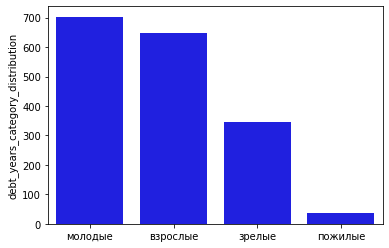

In [35]:
# визуализируем распределение должников по возрасту
sns.barplot(x=age_list, 
            y="debt_years_category_distribution", 
            color='blue', 
            data=df_age, 
            order=['молодые', 'взрослые','зрелые', 'пожилые'])

Основная масса должников приходится на молодых и взрослных. зрелые и пожилые намного чаще не  сьпглаятся должниками.

<AxesSubplot:ylabel='percent_debt_years_category_distribution'>

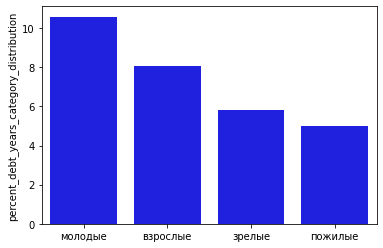

In [36]:
# визуализируем распределение должников по возрасту
sns.barplot(x=age_list, 
            y="percent_debt_years_category_distribution", 
            color='blue', 
            data=df_age, 
            order=['молодые', 'взрослые','зрелые', 'пожилые'])

Чаще всего не возвращают кредиты в срок молодые люди. Чуть реже это делают взрослые. Пожилые люди реже всех становятся должниками. Возможно потому, что онм реже берут взаймы. Но если берут, то обязательно возвращают кредит.

**Вывод.** Да, есть зависисость между возрастом клиента и возвратом кредита в срок. Более всего склонны пропускать сроки выплат молодые и чуть меньше взрослые люди. Зрелые и пожилые, напротив, являются более надёжными заёмщиками. Пожилые люди редко берут кредит а этом бпнке, за точно отдают деньги в срок. Видимо, жизненный опыт, осознанность помогают планировать позволяют более раззумно пвсарпяжаться своими финансами.

##### 3.0.3. Есть ли зависимость между уровнем образованием и возвратом кредита в срок?

In [82]:
# сгруппируем данные по уровню образования
education_grouped = data.groupby('education')
# узнаем распределение семей по уровню образования
education_distribution = education_grouped['debt'].count()
# узнаем распределение задолжкеностей по уровню образования
debt_education_distribution = education_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории  по уровню образования
percent_debt_education_distribution = round(100 * debt_education_distribution / education_distribution, 2)

In [84]:
# создадим на основе Series один DataFrame
df_education = pd.DataFrame()
education_list = ['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']
education_order = ['начальное', 'среднее', 'неоконченное высшее', 'высшее', 'ученая степень']
# назначим индексы
df_education['education'] = education_list

df_education['education_distribution'] = list(education_distribution)
df_education['debt_education_distribution'] = list(debt_education_distribution)
df_education['percent_debt_education_distribution'] = list(percent_debt_education_distribution)
df_education

,education,education_distribution,debt_education_distribution,percent_debt_education_distribution
0,высшее,5227,278,5.32
1,начальное,282,31,10.99
2,неоконченное высшее,741,68,9.18
3,среднее,15075,1355,8.99
4,ученая степень,6,0,0.00


<AxesSubplot:xlabel='education_distribution'>

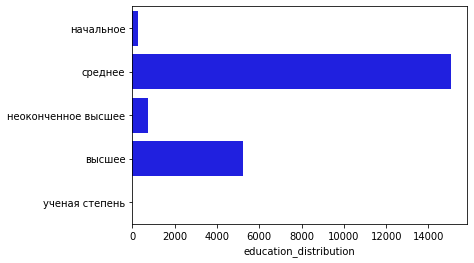

In [85]:
# визуализируем распределение клиентов по уровню образования
sns.barplot(y=education_list, 
            x="education_distribution", 
            color='blue', 
            data=df_education, 
            order=education_order)

Больше всего за кредитами обращаются люди со средним образованием. Люди с высшим образованием обращаются примерно в 3 раза реже. Людям без среднего образования редко дают кредиты. Люди с незаконченным высшим образованием, скорее всего, являются студентами, которым учёба может помегать зарабатывать достаточно для выплаты кредитов, поэтому они тоже представлены в небольшом количестве.

<AxesSubplot:xlabel='debt_education_distribution'>

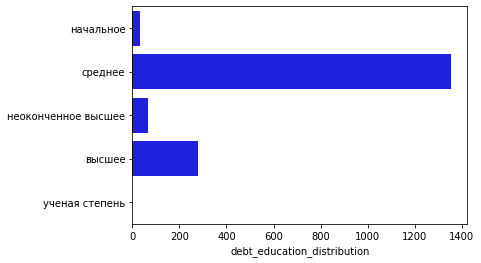

In [41]:
# визуализируем распределение должников по уровню образования
sns.barplot(y=education_list, 
            x="debt_education_distribution", 
            color='blue', 
            data=df_education, 
            order=education_order)

Сооотношение задолжников примерно такое же, на первый взгляд. Посмртрим на данные более пристально.

<AxesSubplot:xlabel='percent_debt_education_distribution'>

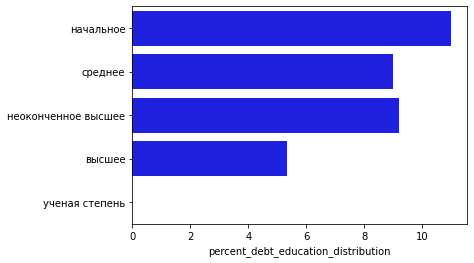

In [42]:
# визуализируем распределение процентов среди должников по уровню образования
sns.barplot(y=education_list, 
            x="percent_debt_education_distribution", 
            color='blue', 
            data=df_education, 
            order=education_order,
           )

Среднее значение более `8%` задолжников составляют люди с начальным, средним и незаконченным высшим образованием. Люди с высшим образованием и учёной степенью гораздо чаще выалпчивают кредиты вовремя.

**Вывод.** Да, зависимость между уровнем образованием и возвратом кредита в срок есть. Киленты, которые неимеют высшего образования, с большей вероятностью просрочат выплаты. Люди с высшим образованием и учёной степенью более надёжные заёмщики. Видимо, хорошее образование и высокая квалификация позволяют найти высокооплачиваемую работу, которая позволяет выплачивать кредиты вовремя или не брать их вовсе.

##### 3.0.4. Есть ли зависимость между типом занятости и возвратом кредита в срок?

In [43]:
# сгруппируем данные по типу занятости
income_type_grouped = data.groupby('income_type')
# узнаем распределение клиентов по типу занятости
income_type_distribution = income_type_grouped['debt'].count()
# узнаем распределение задолжкеностей по типу занятости
debt_income_type_distribution = income_type_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по типу занятости
percent_debt_income_type_distribution = round(100 * debt_income_type_distribution / income_type_distribution, 2)

In [44]:
# создадим на основе Series один DataFrame
df_income_type = pd.DataFrame()
income_type_list = ['безработный', 'в декрете', 'госслужащий', 'компаньон', 'пенсионер', 'предприниматель', 'сотрудник', 'студент']
income_type_order = ['пенсионер', 'безработный', 'студент', 'в декрете', 'сотрудник', 'компаньон', 'предприниматель', 'госслужащий']
# назначим индексы
df_income_type['income_type'] = income_type_list
df_income_type['income_type_distribution'] = list(income_type_distribution)
df_income_type['debt_income_type_distribution'] = list(debt_income_type_distribution)
df_income_type['percent_debt_income_type_distribution'] = list(percent_debt_income_type_distribution)
df_income_type

,income_type,income_type_distribution,debt_income_type_distribution,percent_debt_income_type_distribution
0,безработный,2,1,50.00
1,в декрете,1,1,100.00
2,госслужащий,1451,86,5.93
3,компаньон,5047,374,7.41
4,пенсионер,3812,216,5.67
5,предприниматель,2,0,0.00
6,сотрудник,11015,1054,9.57
7,студент,1,0,0.00


<AxesSubplot:xlabel='income_type_distribution'>

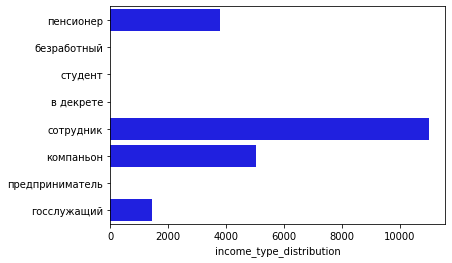

In [45]:
# визуализируем распределение клиентов по типу занятости
sns.barplot(y=income_type_list, 
            x="income_type_distribution", 
            color='blue', 
            data=df_income_type, 
            order=income_type_order)

Наиболее часто за кредитаит обращаются обычные сотрудники. Следом за ними госслужащие и пенсионеры. Реже всех за кредитами в этот банк обращаются прндприниматели. Безработным, студентам и людям в декрете редко выдают кредиты в этом учреждении. Предприниматели крайнк редко обращвются за кредитами. Возможно потому, что им они не нужны и потому, что ставка по кредиту намного выше предполагаемой прибыли, что делает кредит бессмысленным.

<AxesSubplot:xlabel='debt_income_type_distribution'>

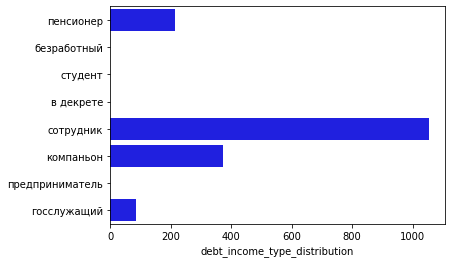

In [46]:
# визуализируем распределение должников по типу занятости
sns.barplot(y=income_type_list, 
            x="debt_income_type_distribution", 
            color='blue', 
            data=df_income_type, 
            order=income_type_order)

Каких-то резких контрастов в таком масштабе не наблюдается. Посмотрим на проценты.

<AxesSubplot:xlabel='percent_debt_income_type_distribution'>

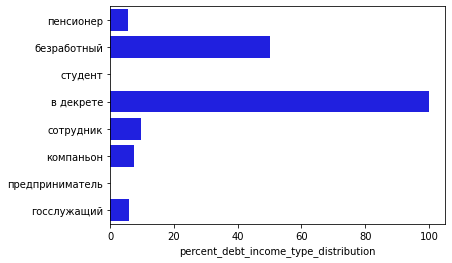

In [47]:
sns.barplot(y=income_type_list, 
            x="percent_debt_income_type_distribution", 
            color='blue', 
            data=df_income_type, 
            order=income_type_order)

Наиболее ненадёжными заёмщиками, пропускающими сроки выплат по кредитам, являются люди без работы и в дикрете. Чуть лучше ситуация обстоит с сотрудниками, процент задолжников среди которых чуть выше среднего, `9%`. Видно, что имеющийся уровень заработной платы не позволяет наёмным работникам жить в достатке. Они вынуждены брать кредиты и не могут их регелярно выплачивать. Хорошо дела обстоят с госслужащими и пенсионерами.

**Вывод.** Да, существует зависимость между типом занятости и возвратом кредита в срок. Больше всешл склонны к просрочке безработные и люди в декрете, а также рядовые сотрудники. Меньше всего пропускать сроки выплат пенсионеры и госслужащие.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [48]:
# сгруппируем данные по количеству детей
children_grouped = data.groupby('children')
# узнаем распределение семей по количеству детей
children_distribution = children_grouped['debt'].count()
# узнаем распределение задолжкеностей по количеству детей
debt_distribution = children_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по количеству детей
percent_debt_distribution = round(100 * debt_distribution / children_distribution, 2)

In [49]:
# создадим на основе Series один DataFrame
df_children = pd.DataFrame()
df_children['children_distribution'] = list(children_distribution)
df_children['debt_distribution'] = list(debt_distribution)
df_children['percent_debt_distribution'] = list(percent_debt_distribution)
df_children

,children_distribution,debt_distribution,percent_debt_distribution
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


<AxesSubplot:ylabel='children_distribution'>

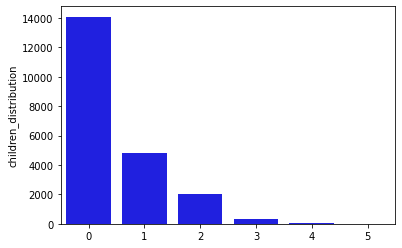

In [50]:
# визуализируем распределение клиентов по количеству
sns.barplot(x=[0,1,2,3,4,5], y="children_distribution", color='blue', data=df_children)

Как можно видеть из рисунка, это степенное распределение. Чем больше детей, тем меньше клиентов, у которых они есть. Больше половины клиентов совсем не имеют детей. Лишь у малой их части более 4-5 детей. Теперь посмотрим, как много клиентов имеют задолженность.

<AxesSubplot:ylabel='debt_distribution'>

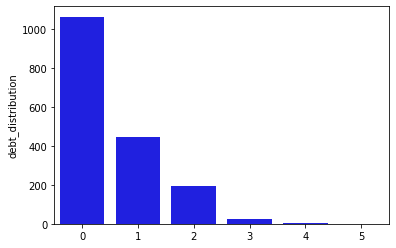

In [51]:
# визуализируем распределение должников по количеству детей
sns.barplot(x=[0,1,2,3,4,5], y="debt_distribution", color='blue', data=df_children)

И количество должников тоже имеет степенное распределение. При этом у людей с 5 детьми совсем нет задолженостей. Видимо, подростающие дети помогают по хозяйству, в работе или материнский капитал позволяет не иметь долгов. Или выборка не совсем презентивна.
Теперь рассмотрим процент должников в каждой категории по количеству детей.

<AxesSubplot:ylabel='percent_debt_distribution'>

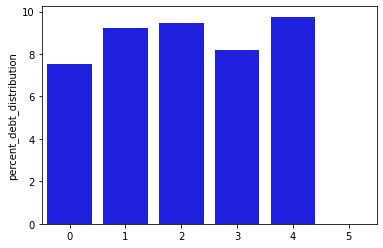

In [52]:
# визуализируем процент должников среди клиентов, рпсвределённый по количеству детей
sns.barplot(x=[0,1,2,3,4,5], y="percent_debt_distribution", color='blue', data=df_children)

Как можно видеть, процент должников среди бездетных ниже среднего и составляет `7,5%`. Остальные категории клиентов с детьми, кроме тех, у кого 5 детей, пропускают сроки выплат более, чем в `8%` случаев. У людей с тремя детьми ситуация близка к типичной. Взоможно, помогают выплаты м льготы государства или подросшие дети. 

При этом у людей с 5 детьми совсем нет задолженостей. Видимо, подростающие дети помогают по хозяйству, в работе или материнский капитал позволяет не иметь долгов. Или выборка не совсем презентивна. Люди с большим количеством детей настолько редки, что просто не попали в число клиентов этого банка.

**Вывод:** Да, существует зависимость между количеством детей и возвратом кредита в срок. Люди бездетей менее склонны пропускать выплаты, чем клиенты с детьми. Наиболее хорошо справляются с кредитами люди, у которых трое детей.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [53]:
# сгруппируем данные по семейному статусу клиента
family_status_grouped = data.groupby('family_status')
# узнаем распределение клиентов по семейному статусу
family_status_distribution = family_status_grouped['debt'].count()
# узнаем распределение задолжкеностей по семейному статусу
debt_family_status_distribution = family_status_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по семейному статусу
percent_family_status_debt_distribution = 100 * debt_family_status_distribution / family_status_distribution

In [54]:
# создадим список всех категорий семейного положения
family_list = ['Не женат / не замужем','в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']
family_list

['Не женат / не замужем',
 'в разводе',
 'вдовец / вдова',
 'гражданский брак',
 'женат / замужем']

In [55]:
family_order = ['Не женат / не замужем',
                'гражданский брак', 'женат / замужем',
                'в разводе', 'вдовец / вдова']

In [56]:
# создадим DataFrame
df_family_status = pd.DataFrame()
# заполним столбец с перечнем категорий
df_family_status['family_status'] = family_list
# заполним DataFrame данными из Series
df_family_status['family_status_distribution'] = list(family_status_distribution)
df_family_status['debt_family_status_distribution'] = list(debt_family_status_distribution)
df_family_status['percent_family_status_debt_distribution'] = list(percent_family_status_debt_distribution)
# назначим индексы
df_family_status.set_index('family_status', inplace=True)
df_family_status

,family_status_distribution,debt_family_status_distribution,percent_family_status_debt_distribution
family_status,,,
Не женат / не замужем,2796,273,9.763948
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558


<AxesSubplot:xlabel='family_status_distribution'>

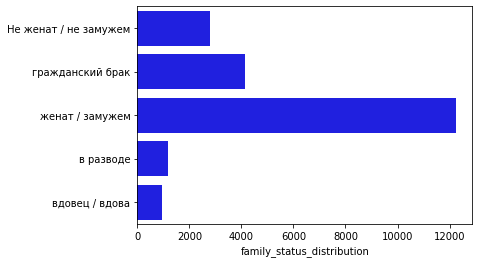

In [57]:
# визуализируем распределение процентов среди должников по уровню образования
sns.barplot(y=family_list, 
            x="family_status_distribution", 
            color='blue', 
            data=df_family_status, 
            order=family_order,
           )

Больше всего за кредитами обращаются клиенты, состоящие официально зарегистрированных в отношениях, чуть далее за ними следуют люди, не оформившие отношения, но состоящие в них. Совместная жизнь, ведение хозяйство, возможная покупка общего жилья, воспитание детей - всё это может требовать больше расходов. Одинокие люди тоже тратятся и берут кредиты, но на собственные нужды. Люди, пережившие отношения, разведённые, вдовцы и вдовицы, меньше берут кредиты.

<AxesSubplot:xlabel='debt_family_status_distribution'>

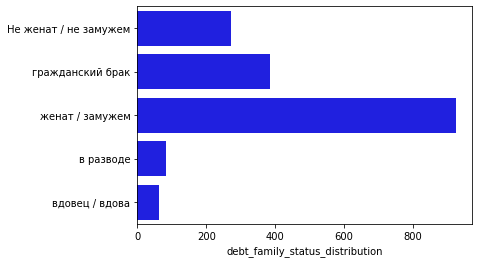

In [58]:
# визуализируем распределение клиентов по количеству
sns.barplot(y=family_list, 
            x="debt_family_status_distribution", 
            color='blue', 
            data=df_family_status, 
            order=family_order,
           )

Каких-то резких контрастов в таком масштабе не наблюдается. Посмотрим на проценты.

<AxesSubplot:xlabel='percent_family_status_debt_distribution'>

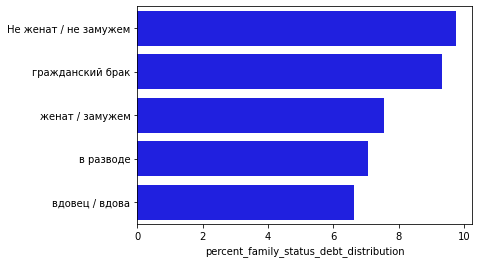

In [59]:
# визуализируем распределение клиентов по количеству
sns.barplot(y=family_list, 
            x="percent_family_status_debt_distribution", 
            color='blue', 
            data=df_family_status, 
            order=family_order,
           )

Из графика видно, что одинокие люди и те, кто не оформил свои отношения, несколько хуже справляются с долговыми обязаьтельствами. Немного обстоят дела у женатых клиентов. Ещё лучше с кредитаит справляются те, кто перестал быть в отношениях - разведённые и пережившие смерть второй половины.

Объяснения могут быть очень разные. Возможно те, кто одинок - это молодые и незрелые люди, которые не умеют ещё планировать свои расходы. Или этл малообщительнвн люди, у которых не получается постротьб ни личное, ни деловое общение. Люди в брачных отношениях, а тем более разведённые или вдовцы, - это с большей вероятностью взрослые и достаточно зрелые, сформировавшиеся личности.

**Вывод:** Да, есть зависимость между семейным положением и возвратом кредита в срок. Люди находящиеся в отношениях или пережившие развод или смерть партнёра с большей вероятностью отдают кредит, чем одинокие или люди в начинающихся отношениях.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [60]:
# сгруппируем данные по уровню дохода
income_category_grouped = data.groupby('total_income_category')
# узнаем распределение клиентов по уровню дохода
income_category_distribution = income_category_grouped['debt'].count()
# узнаем распределение задолжкеностей по уровню дохода
debt_income_distribution = income_category_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по уровню дохода
percent_debt_income_distribution = round(100 * debt_income_distribution / income_category_distribution, 2)

In [62]:
# создадим на основе Series один DataFrame
df_income_category = pd.DataFrame()
df_income_category['income_category'] = ['A', 'B', 'C', 'D', 'E']
# заполним DataFrame данными из Series
df_income_category['income_category_distribution'] = list(income_category_distribution)
df_income_category['debt_distribution'] = list(debt_income_distribution)
df_income_category['percent_debt_distribution'] = list(percent_debt_income_distribution)
# назначим индексы
df_income_category.set_index('income_category', inplace=True)
df_income_category

,income_category_distribution,debt_distribution,percent_debt_distribution
income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


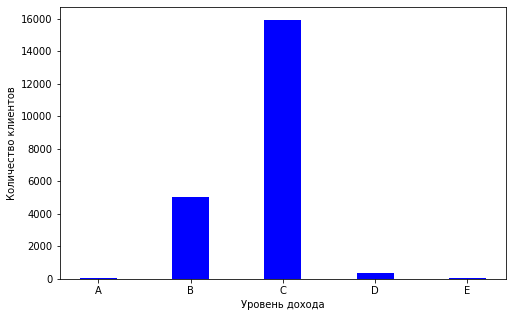

In [86]:
fig = plt.figure(figsize=(8, 5))
# визуализируем данные распределение клиентов по уровню дохода 
plt.bar(['A', 'B', 'C', 'D', 'E'], list(income_category_distribution), color='blue', width=0.4)
plt.xlabel("Уровень дохода")
plt.ylabel("Количество клиентов")
plt.show()

Больше всего кредитов берут люди со средним достатком, Люди с очень высоким и очень низким уровнями доходо представлены мало. Первые  сами не нуждаются в кредитах, а вторым их не дают, хотя нужда у них есть.

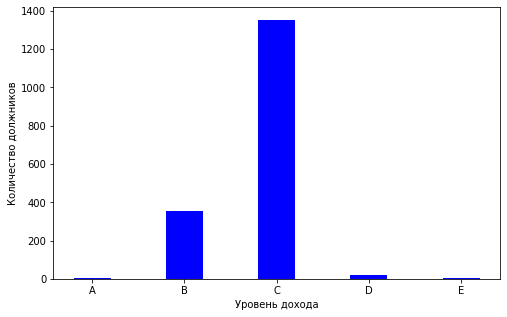

In [87]:
fig = plt.figure(figsize=(8, 5))
# визуализируем данные распределение задолжкеностей по уровню дохода 
plt.bar(['A', 'B', 'C', 'D', 'E'], list(debt_income_distribution), color='blue', width=0.4)
plt.xlabel("Уровень дохода")
plt.ylabel("Количество должников")
plt.show()

Каких-то резких контрастов в таком масштабе не наблюдается. Посмотрим на проценты.

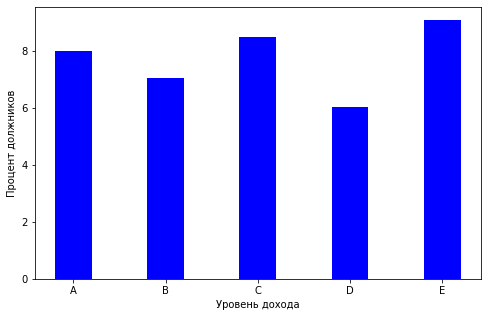

In [88]:
fig = plt.figure(figsize=(8, 5))
# визуализируем данные по процентам задолженностей в каждой категории по уровню дохода
plt.bar(['A', 'B', 'C', 'D', 'E'], list(percent_debt_income_distribution), color='blue', width=0.4)
plt.xlabel("Уровень дохода")
plt.ylabel("Процент должников")
plt.show()

При этом хуже всего с выплатами справляются люди с самым низким, средним и высоким доходом. Люди, уже зарабатывающие выше самого низшего, но ниже среднего, и выше среднего и ниже самого высокого, лучше справляется с кредитами.

**Вывод:** Да, имеется частичная завмсимость между уровнем дохода и возвратом кредита в срок.
Если сравнивать толькл две самые многочисленные категории - доход выше среднего (`B`) и средний доход (`C`), - можно сказать, что люди с доходом выше среднего (`B`) справляются с долговой нагрузкой лучше, чем люди со средним доходом (`C`).
Явной зависимости между уровнем дохода и возвратом кредита в срок не имеется. Люди с высоким (`A`), средним (`C`) и низким (`E`) доходами одинаково не справляются с кредитной нагрузкой. Несколько лучше ситуация у тех, кто уже не беден (`D`) или ещё не богат (`B`).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [66]:
# сгруппируем данные по уровню дохода
purpose_category_grouped = data.groupby('purpose_category')
# узнаем распределение клиентов по цели кредита
purpose_category_distribution = purpose_category_grouped['debt'].count()
# узнаем распределение задолжкеностей по цели кредита
debt_purpose_distribution = purpose_category_grouped['debt'].sum()
# узнаем процент задолженностей в каждой категории по цели кредита
percent_debt_purpose_distribution = round(100 * debt_purpose_distribution / purpose_category_distribution, 2)

In [89]:
# создадим на основе Series один DataFrame
df_purpose_category = pd.DataFrame()
purpose = ['Автомобиль', 'Недвижимость', 'Образование', 'Свадьба']
df_purpose_category['income_category'] = purpose
# заполним DataFrame данными из Series
df_purpose_category['purpose_category_distribution'] = list(purpose_category_distribution)
df_purpose_category['debt_purpose_distribution'] = list(debt_purpose_distribution)
df_purpose_category['percent_debt_purpose_distribution'] = list(percent_debt_purpose_distribution)
# назначим индексы
df_purpose_category.set_index('income_category', inplace=True)
df_purpose_category

,purpose_category_distribution,debt_purpose_distribution,percent_debt_purpose_distribution
income_category,,,
Автомобиль,4279,400,9.35
Недвижимость,10751,780,7.26
Образование,3988,369,9.25
Свадьба,2313,183,7.91


<AxesSubplot:ylabel='purpose_category_distribution'>

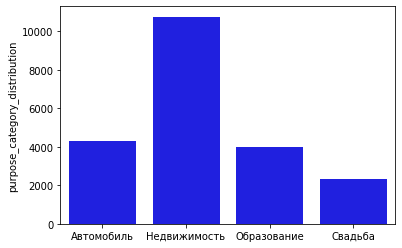

In [69]:
# визуализируем распределение клиентов по цели кредита
sns.barplot(x=purpose, y="purpose_category_distribution", color='blue', data=df_purpose_category)

Наибольшее число заёмщиков обращаются за кредитами для операций с недвижимостью. Примерно по 20-25% процентов обращается за средитами для получения образовани и покупки автомобиля. Меньше всего клиентов берут кредит на свадьбу.

<AxesSubplot:ylabel='debt_purpose_distribution'>

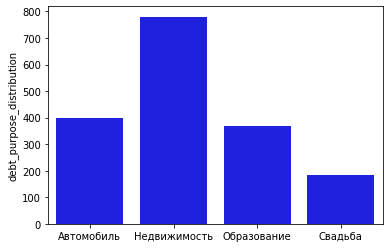

In [70]:
# визуализируем распределение задолжкеностей по цели кредита
sns.barplot(x=purpose, y="debt_purpose_distribution", color='blue', data=df_purpose_category)

Каких-то резких контрастов в таком масштабе не наблюдается. Посмотрим на проценты.

<AxesSubplot:ylabel='percent_debt_purpose_distribution'>

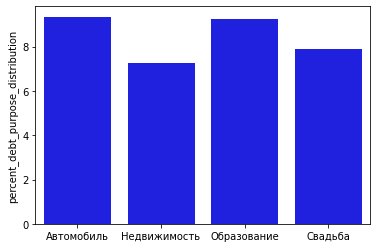

In [71]:
# визуализируем процент задолженностей в каждой категории по цели кредита
sns.barplot(x=purpose, y="percent_debt_purpose_distribution", color='blue', data=df_purpose_category)

<p>Лучше всего клинты банка справляются с выплатами за кредиты по недвижимости и на свадьбу. Приобретение недвижимости, помимо оплаты коммунальных услуг, ремонта пр. расходов, может приносить доход в видн сдачт в найи и аренды, организации бизнеса и т.п. Свадьба, как уже льинчадлмб выше, меняет семейный статус людей, тоже имеет как положительные, так и отрицательгын стороны для финансового благополучия.</p>
<p>Хуже получается это у тех, кто берёт займы на образование и автомобиль. Видимр, беря кредит на образование, люди долгое время не имют возможность зарабатывать деньги на его оплату. Учёба и поиск работы не позволяют это делать в полной мере. Автомобиль - это актив, имеющий как положительные сторонф, так и отрицательные. С одной стороны, он может быть средством заработка и экономить время. С другой стороны, автовладельцы вынуждены тратить деньги на обслуживание автомобиля, его ремонт, азправку и выплаты страховых взносов.</p>

**Вывод:** Цели кредита влияют на его возврат в срок. Наилучшим потенциалом для возврата кредита являюься свадьбы и операции с недвижимостью. Образование и автомобиль - более рисковые.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропкски были в основном у двух графах: общий трудовой стаж и ежемесячный доход. Обе они относятся к трудовой деятельности человека, её длительности (времени) и результату (деньгах). Возможно часть людей (эти пропуски составляют около 10% от всей выборки) трудно точно посчитать свой стаж в днях. Также можно предположить, что некоторые из них не могут указать месячный доход из-за того, что они находятся в т.н. "серой" зоне, т.е. имеют теневой доход. Возможно, что именно у этих людей произошёл технический сбой при заполнении заявки.

О пропусках в графе о количестве детей, можно сказать, что или оператор случайно опечтался, или цифра не была неверно распозна системой расарзнавания образов. Так,например, значение `-1` могло быть получено в последнем случае. Значение в `20` детей маловероятно и, скорее всего, имела место опечатка.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнять пропуски в количественных переменных медианными значениями лучше, т.к. они броее точно отражают наиболее типичные и распространённые данные. Среднее значсение в этом плане справляется хуже. Так, если в обычный бар войдёт Билл Гейтс, то средний доход всех присутствующих очень сильно увеличится. Однако на самом деле к реальному доходу всех присуствующих будет не среднее арифметическое, а медианное значение.

### Шаг 4: общий вывод.

#### 2.9.1. Вывод по предобработке.

В рамках предобработки данным мы:

- заполнили пропуски в графах трудового стажа и ежемесячного дохода на соответсвующие им медианные для каждой категории типа занятости;
- заменили тип данных в графе ежемесячный дохо на цнлочисленное, чьл сэкономит память и увеличит скорость работы алгоритма;
- избавались от дублирующих данных;
- провели категоризацию данных, получив 5 уровней дохода, 4 возрастные группы и 4 группы по цели кредитования;

Из первой части видно, что тщательная и хорошо выполненная предобработка данных необходима для хорогего анализа данных. Заполнение пропусков делает данные более полными, устанение дубликатов и и поправка анрмальных значений - более корректными. Предобработка для реальных данных небоходима.

#### 2.9.2. Вывод по анализу данных.

Анализ большей части признаков оказался успешным. Установлено множество случаев зависимости сроков возврата кредита от различных показателей:

- возраст;
- пол;
- уровень образования;
- тип занятости;
- уровень дохода;
- количество детей;
- семейное положение;
- цель кредита.

Данные были сгруппированы по каждому из признаков. Для каждого признака сделаны визуализации и выявлена связь со способностью клиента к выплате кредита. Былм выявлкеы признамки надёжных и ненадёхных клиентов.

Можно выявить условные прифили двух клиентов: *исполнительного плательщика* и *типичного должника*.

**Исполнительный плательщик** - это зрелая женщина, предпенсионного возраста, разведённая или вдова, без детей. Она берёт кредит на операцию с жилплощадью или на свадьбу. Доход у неё чуть выше или среднего. Она хорошо образована и занимается предприниматеольством.

**Типичный должник** - это молодой мужчина, входящий во взрослую жизнь, одинокий или находящийся в гражданском браке, начинающий семейную жизнь и имющий много детей. Он является наёмным сотрудником и имеет средний доход: или даже ниже или очень низкий. Он плохо образован, не имеет высщешо или даже среднего образования. Поэтому он берёт кредит на образование, а так же на автомобиль, который не может себе позволить.

Чем больше у клиента черт того или иного профиля, тем яснее, сможет он выплачивать кредит в срок или нет.